## Churn com Machine Learning

A base [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) está disponível no Kaggle. A base possui 20 atributos (variáveis independentes) e 1 uma variável target (dependente) para 7043 clientes. A variável target indica se o clientes deixou a compahia (churn=yes) no último mês.

Os atributos são: 

* customerID
* gender
* SeniorCitizen
* Partner
* Dependents
* tenure
* PhoneService
* MultipleLines
* InternetService
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* StreamingTV
* StreamingMovies
* Contract
* PaperlessBilling
* PaymentMethod
* MonthlyCharges
* TotalCharges
* Churn

Este material está estruturado da seguinte forma:

1. Análise Exploratória dos Dados
2. Preprocessamento dos Dados
3. Criação do modelo e avaliação
4. Melhorias no modelo (hiperparâmetro)


---

Fontes: 

https://towardsdatascience.com/churn-prediction-with-machine-learning-ca955d52bd8c

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

https://www.youtube.com/watch?v=J5E4umn8Fb4

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

7043 clientes clientes e 21 colunas (20 variáveis independentes e 1 uma variável target

In [3]:
df.shape

(7043, 21)

Amostra da base:

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3420,8663-UPDGF,Female,0,No,No,26,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),69.50,1800.05,No
3662,6410-LEFEN,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.15,416.45,Yes
3515,5206-HPJKM,Male,0,No,No,17,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.50,934.15,No
1312,1661-CZBAU,Male,0,No,No,48,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),70.95,3629.2,No
4205,6427-FEFIG,Female,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),78.60,1846.65,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Não há valores ausentes na base então podemos seguir para etapa de exploração dos dados

In [6]:
df.isna().sum().sum()

0

### 1. Análise Exploratória dos Dados

A variável target está desbalanceada. A classe positiva (churn=yes) é muito menor do que a classe negativa (churn=no). Como o desbalanceamento afeta negativamente a performance do modelo, principalmente se avaliarmos o modelo de acordo com a acurácia, será necessário usar uma técnica de reamostragem ou tratar o problema com técnicas especificas para detecão de anomalia. Vou optar pela reamostragem neste exemplo.

In [7]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Distribuição das classes (original)')

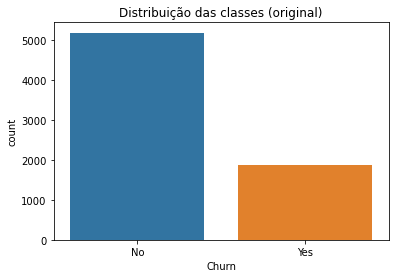

In [8]:
sns.countplot('Churn', data=df).set_title('Distribuição das classes (original)')

#### Atributos categóricos

In [9]:
for column in df:
    if df[column].dtypes=='object':
        print(f'{column}: {df[column].unique()}') 

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


Primeiro vamos olhar o balanceamento entre os atributos binários (apenas dois valores). Há um desbalanceamento acentuado nos atributos SeniorCitizen and PhoneService. A maioria dos clientes não é sênior e possui um serviço telefônico. 

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

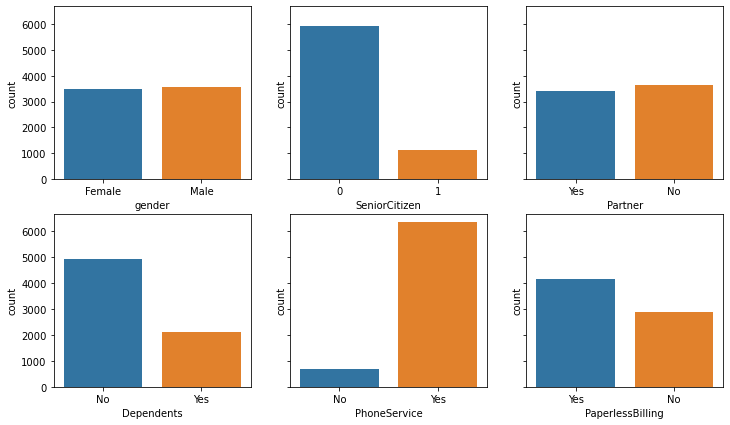

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

Observando a porcentagem de homens e mulheres que deixaram a empresa parece que o atributo gender não desempenha nenhum papel na saída. 

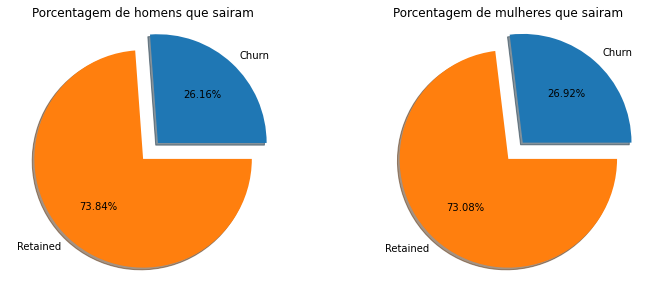

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.pie([len(df[(df.gender == 'Male') & (df.Churn == 'Yes')]),
         len(df[(df.gender == 'Male') & (df.Churn == 'No')])],
        labels=['Churn','Retained'],radius=1,
        autopct='%0.2f%%',shadow=True,explode=[0.2,0])
ax2.pie([len(df[(df.gender == 'Female') & (df.Churn == 'Yes')]),
         len(df[(df.gender == 'Female') & (df.Churn == 'No')])],
        labels=['Churn','Retained'],radius=1,
        autopct='%0.2f%%',shadow=True,explode=[0.2,0])
ax1.set_title('Porcentagem de homens que sairam')
ax2.set_title('Porcentagem de mulheres que sairam')
plt.show()

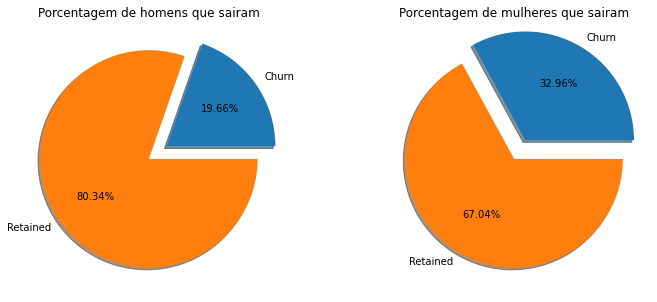

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.pie([len(df[(df.Partner == 'Yes') & (df.Churn == 'Yes')]),
         len(df[(df.Partner == 'Yes') & (df.Churn == 'No')])],
        labels=['Churn','Retained'],radius=1,
        autopct='%0.2f%%',shadow=True,explode=[0.2,0])
ax2.pie([len(df[(df.Partner == 'No') & (df.Churn == 'Yes')]),
         len(df[(df.Partner == 'No') & (df.Churn == 'No')])],
        labels=['Churn','Retained'],radius=1,
        autopct='%0.2f%%',shadow=True,explode=[0.2,0])
ax1.set_title('Porcentagem de homens que sairam')
ax2.set_title('Porcentagem de mulheres que sairam')
plt.show()

Quantidade considerando o target

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

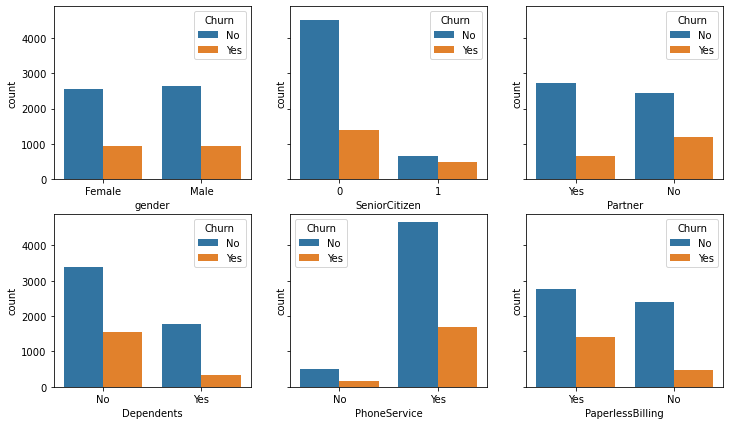

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0], hue='Churn')
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1], hue='Churn')
sns.countplot("Partner", data=df, ax=axes[0,2], hue='Churn')
sns.countplot("Dependents", data=df, ax=axes[1,0], hue='Churn')
sns.countplot("PhoneService", data=df, ax=axes[1,1], hue='Churn')
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2], hue='Churn')

Antes de seguir vou transformar os valores do target em numérico (yes=1, no=0) para fazer algumas análises de média

In [14]:
df.Churn.replace({'Yes':1, 'No':0}, inplace=True)

Olhando os demais atributos categóricos, parece que o Internet service é um bom preditor para a taxa de churn. Como podemos ver, clientes com fibra ótica são mais propensos a churn do que outros clientes, embora não haja uma grande diferença no número de clientes com DSL e fibra óptica. Esta empresa pode ter alguns problemas com a conexão de fibra ótica. 

In [15]:
cols = ['InternetService', 'StreamingMovies', 'OnlineSecurity', 
        'StreamingTV', 'OnlineBackup','DeviceProtection', 'TechSupport', 'MultipleLines']

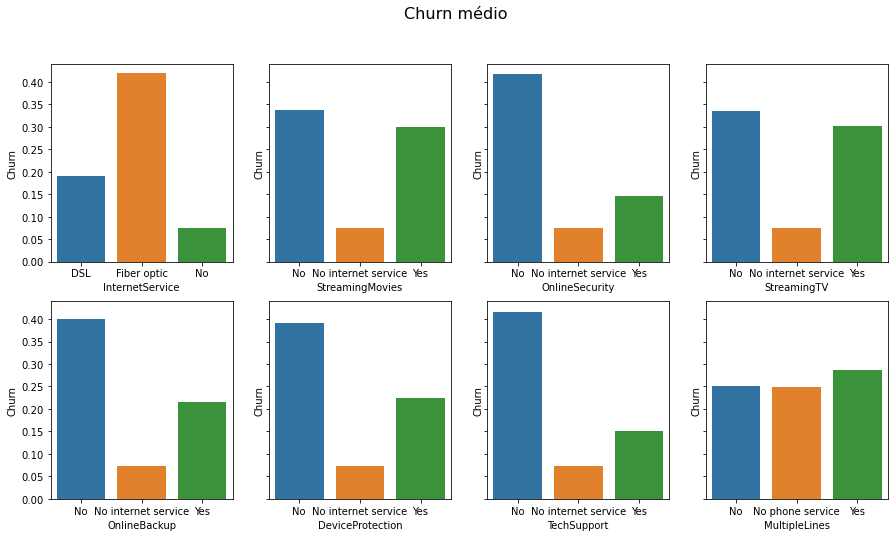

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharey=True)
for i, col in enumerate(cols):
    sns.barplot(data=df.groupby(col).mean()[['Churn']].reset_index(), x=col, y="Churn", ax=axes[int(i/4), i%4])
fig.suptitle('Churn médio', fontsize=16);

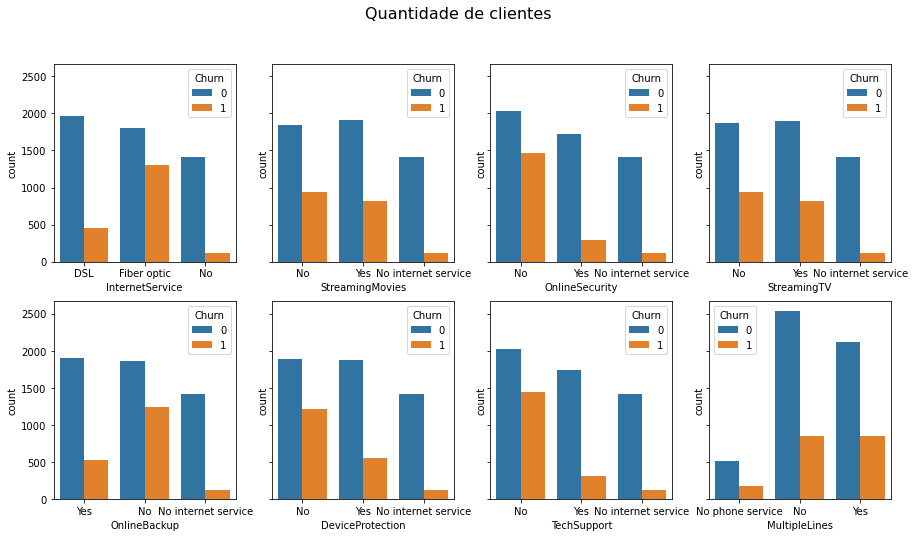

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharey=True)
for i, col in enumerate(cols):
    sns.countplot(col, data=df, ax=axes[int(i/4), i%4], hue='Churn')
fig.suptitle('Quantidade de clientes', fontsize=16);

In [18]:
pd.pivot_table(df, index=['Churn'], columns=['InternetService'], values='MonthlyCharges', aggfunc=np.mean)

InternetService,DSL,Fiber optic,No
Churn,,,
0,60.212105,93.932379,21.136058
1,49.083224,88.126484,20.368142


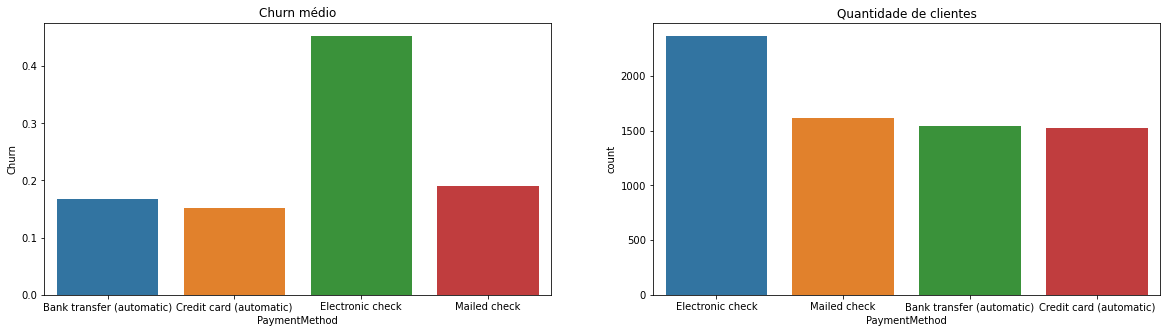

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(data=df.groupby('PaymentMethod').mean()[['Churn']].reset_index(), x='PaymentMethod', y="Churn", ax=axes[0])
axes[0].set_title('Churn médio')
sns.countplot('PaymentMethod', data=df, ax=axes[1])
axes[1].set_title('Quantidade de clientes');

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

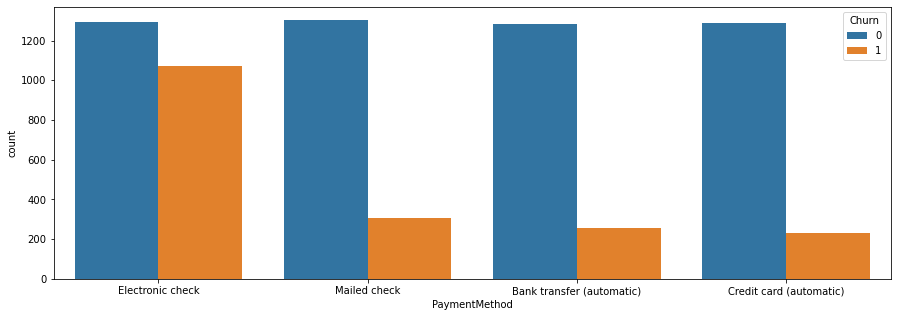

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot("PaymentMethod", data=df,  hue='Churn')

In [21]:
pd.pivot_table(df, index=['Churn'], columns=['PaymentMethod'], values='MonthlyCharges', aggfunc=np.mean)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
0,65.049417,64.562209,74.232032,41.403911
1,77.875581,77.356034,78.700980,54.557143


#### Atributos contínuos

Os atributos contínuos são tenure (número de meses que o cliente permaneceu na empresa), monthly charges e total charges. O valor na coluna de cobranças totais é proporcional à permanência (meses) multiplicada pelas cobranças mensais. Portanto, não é necessário incluir no modelo. Adicionar atributos desnecessários aumentará a complexidade do modelo. É melhor ter um modelo mais simples quando possível. Modelos complexos tendem a se ajustar demais e não generalizar bem para novas observações. Como o objetivo de um modelo de aprendizado de máquina é prever ou explicar novas observações, o overfitting é uma questão crucial.

De acordo com a distribuição da variável de tempo de serviço (tenure), a maioria dos clientes é bem nova ou está há muito tempo na empresa. Nosso objetivo deve ser encontrar uma maneira de manter esses clientes com um mandato de até alguns meses.

Uma tendência semelhante é vista em MonthlyCharges. Parece haver uma lacuna entre as taxas baixas e as altas.

<AxesSubplot:xlabel='MonthlyCharges'>

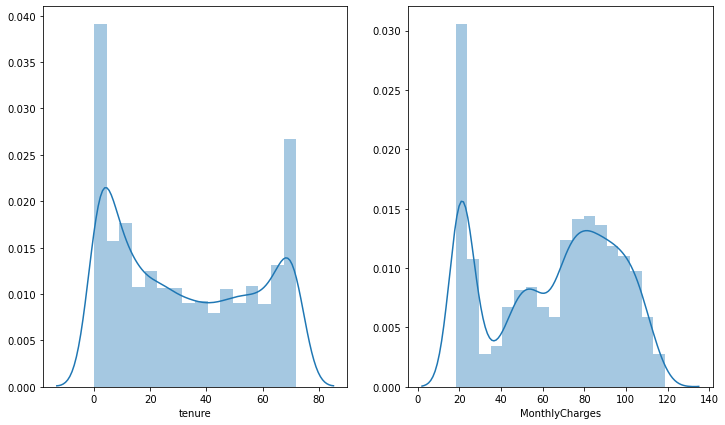

In [22]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

É claro que as pessoas que são clientes há muito tempo tendem a permanecer na empresa. A permanência média em meses das pessoas que deixaram a empresa é 20 meses menor do que a média das pessoas que permanecem. Parece que as cobranças mensais também afetam a taxa de churn.

In [23]:
df[['tenure', 'MonthlyCharges', 'Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


Os atributos contract e tenure podem estar correlacionados porque o cliente com contrato de longo prazo provavelmente permanecerá mais tempo na empresa. Conforme a tabela abaixo clientes com contratos longos são clientes há mais tempo do que clientes com contratos de curto prazo. Acho que o contrato adicionará pouco ou nenhum valor ao recurso de posse, portanto não usarei o recurso de contrato no modelo.

In [24]:
df[['tenure', 'Contract']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


Observações:

* gender - A proporção é quase semelhante, portanto, o gênero não é uma característica importante isoladamente**, mas quando combinado será importante**.
* SeniorCitizen - A proporção de churners em idosos é muito alta. Se o cliente for idoso então está mais propenso a churn.
* Partner - Clientes com parceiros tem maior probabilidade de permancer
* Dependentes - Clientes com dependentes são menos propensos a churn
* InternetService - clientes com fibra óptica são mais propensos a churn, provavelmente devido aos altos custos
* OnlineSecurity - clientes com segurança online são menos propensos a sair
* OnlineBackup - clientes com OnlineBackup são menos propensos a sair
* TechSupport - clientes com DeviceProtection são menos propensos a churn
* StreamingTV/StreamingMovies - Não tem muito efeito, pois a empresa não cobra uma taxa adicional por esses
* PaymentMethod - Os clientes que pagaram com Electronic check são muito propensos a churn.
* tenure - Os clientes com menos de um ano são os que têm maior probabilidade de churn, enquanto os clientes com mais tempo são muito menos propensos a churn
* Contract - Clientes com contrato de um ano ou mais são muito menos propensos a churn

### 2. Preprocessing

Depois de explorar as variáveis, decidi não usar as seguintes variáveis porque elas adicionam pouco ou nenhum poder informativo ao modelo:

In [25]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

Encoding

In [37]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X_data = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [38]:
X_data.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


### 3. Construção do Modelo e Avaliação

In [39]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Tree based models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
X = X_data.drop(['Churn'], axis=1)
y = X_data['Churn']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#### Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
sc = MinMaxScaler()

X_train['tenure'] = sc.fit_transform(X_train[['tenure']])
X_test['tenure'] = sc.transform(X_test[['tenure']])

X_train['MonthlyCharges'] = sc.fit_transform(X_train[['MonthlyCharges']])
X_test['MonthlyCharges'] = sc.transform(X_test[['MonthlyCharges']])

#### Resampling

In [52]:
ros = RandomOverSampler(random_state=42)

In [53]:
X_train_up, y_train_up = ros.fit_resample(X_train, y_train)

#### Modelos

In [54]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_up, y_train_up);

In [57]:
extra = ExtraTreesClassifier(random_state=42)
extra.fit(X_train_up, y_train_up);

In [58]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_up, y_train_up);

In [59]:
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train_up, y_train_up);

Desempenho de cada modelo no treinamento

In [62]:
print("Acurácia treinamento RF: {0}".format(accuracy_score(y_train_up, forest.predict(X_train_up))))
print("Acurácia treinamento EXTRA: {0}".format(accuracy_score(y_train_up, extra.predict(X_train_up))))
print("Acurácia treinamento XGB: {0}".format(accuracy_score(y_train_up, xgb.predict(X_train_up))))
print("Acurácia treinamento LGBM: {0}".format(accuracy_score(y_train_up, lgb.predict(X_train_up))))

Acurácia treinamento RF: 0.9980666988883519
Acurácia treinamento EXTRA: 0.9980666988883519
Acurácia treinamento XGB: 0.9339052682455292
Acurácia treinamento LGBM: 0.8779603673272112


Matriz de confusão do melhor classificador (treinamento)

In [63]:
confusion_matrix(y_train_up, xgb.predict(X_train_up))

array([[3716,  422],
       [ 125, 4013]], dtype=int64)

Desempenho de cada modelo no treinamento

In [64]:
print("Acurácia teste RF: {0}".format(accuracy_score(y_test, forest.predict(X_test))))
print("Acurácia teste EXTRA: {0}".format(accuracy_score(y_test, extra.predict(X_test))))
print("Acurácia teste XGB: {0}".format(accuracy_score(y_test, xgb.predict(X_test))))
print("Acurácia teste LGBM: {0}".format(accuracy_score(y_test, lgb.predict(X_test))))

Acurácia teste RF: 0.772888573456352
Acurácia teste EXTRA: 0.7785663591199432
Acurácia teste XGB: 0.7700496806245565
Acurácia teste LGBM: 0.7608232789212207


In [65]:
confusion_matrix(y_test, xgb.predict(X_test))

array([[825, 211],
       [113, 260]], dtype=int64)

Vamos consolidar os resultados e apresentar em um gráfico de barras

In [66]:
models = {
    'xgboost' : XGBClassifier(random_state=42),
    'lightbgm' : LGBMClassifier(random_state=42),
    'extratrees' : ExtraTreesClassifier(random_state=42),
    'random forest' : RandomForestClassifier(random_state=42)
}

In [67]:
values = []
for name, model in models.items():
    model.fit(X_train, y_train)
    acc_train = accuracy_score(y_train_up, model.predict(X_train_up))
    acc_test = accuracy_score(y_test, model.predict(X_test))
    values.append(dict(modelo=name, train=acc_train, test=acc_test))

In [68]:
table = pd.DataFrame(values).melt(id_vars=['modelo'], 
                                  value_name='acuracia', var_name='base').groupby(['modelo', 'base']).mean().reset_index()
table

,modelo,base,acuracia
0,extratrees,test,0.773598
1,extratrees,train,0.996858
2,lightbgm,test,0.804826
3,lightbgm,train,0.805824
4,random forest,test,0.794180
5,random forest,train,0.996858
6,xgboost,test,0.795600
7,xgboost,train,0.889923


Text(0.5, 0, 'Modelo')

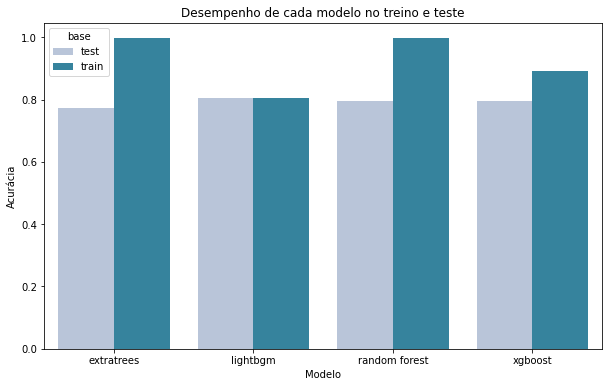

In [69]:
fig,axes= plt.subplots(1,1,figsize=(10,6))
ax = sns.barplot(x='modelo', y='acuracia', hue='base', data=table, palette='PuBuGn')
ax.set_title('Desempenho de cada modelo no treino e teste')
ax.set_ylabel('Acurácia')
ax.set_xlabel('Modelo')

#### Importância dos atributos na construção do modelo

Nos modelos baseados em árvores temos a importância dos atributos fornecida pelo "feature_importances_". São calculadas como a média e o desvio padrão do acúmulo da diminuição da impureza dentro de cada árvore.

De acordo com o resultado abaixo os três atributos mais importantes são: tenure, MonthlyCharges, InternetService_Fiber optic. O que faz sentido de acordo com nossa análise exploratória dos dados.

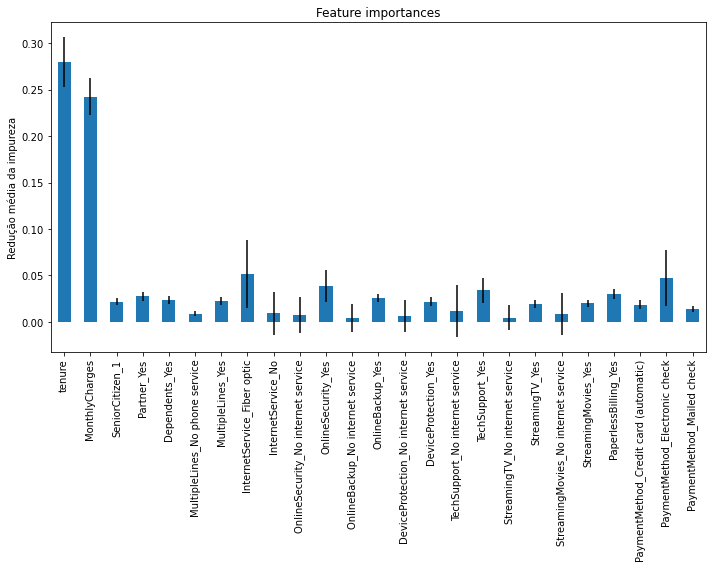

In [70]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots(figsize=(10,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Redução média da impureza")
fig.tight_layout()

Caso o modelo não seja baseado em árvore e você queira entender a importância dos atributos você pode usar o Feature Permutation Importance. Essa técnica nos diz o quanto o atruibuto interfere no desempenho do modelo, quanto maior, mais o modelo confia naquele atributo e, consequentemente, maior o impacto no modelo.

Ao contrário da importância da floresta aleatória baseada em impureza, ela não sofre "overfitting", pois a importância é obtida com dados de teste.

In [71]:
from sklearn.inspection import permutation_importance

In [72]:
result = permutation_importance(forest, X_test, y_test, n_repeats=100, random_state=42, n_jobs=-1)
forest_importances = pd.Series(result.importances_mean, index=X.columns)

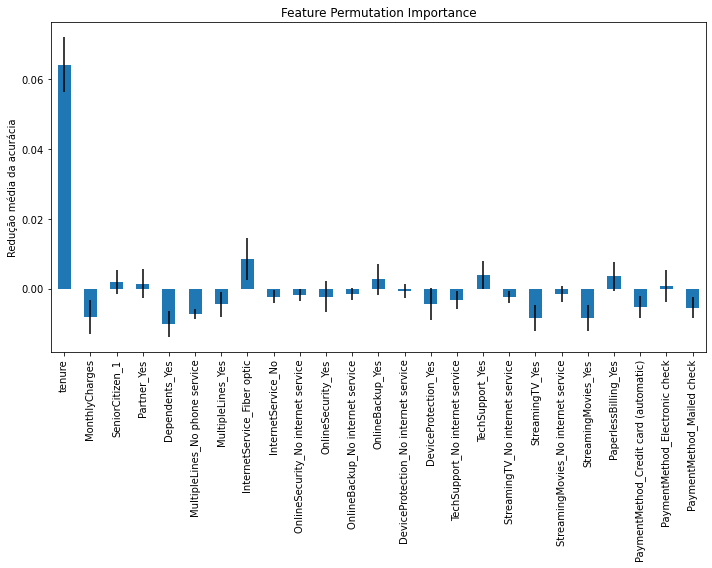

In [73]:
fig, ax = plt.subplots(figsize=(10,8))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature Permutation Importance")
ax.set_ylabel("Redução média da acurácia")
fig.tight_layout()
plt.show()

### 4. Melhorias no modelo

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
params = {'n_estimators':[150,200,250,300], 
          'max_depth':[5,15,20,25]}
clf = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=-1, cv=5)

In [76]:
clf.fit(X_train_up, y_train_up)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=42, reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'max_depth': [5, 15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [77]:
clf.best_params_

{'max_depth': 25, 'n_estimators': 300}

In [78]:
clf.best_score_

0.8968135645168352

In [79]:
accuracy_score(y_test, clf.predict(X_test))

0.7650816181689141

In [80]:
confusion_matrix(y_test, clf.predict(X_test))

array([[881, 155],
       [176, 197]], dtype=int64)

---

In [95]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_up.to_numpy(),
    feature_names=X_train_up.columns,
    class_names=[0, 1],
    mode='classification'
)

In [96]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[40], 
    predict_fn=forest.predict_proba
)

C:\Users\ana.lima\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [97]:
exp.show_in_notebook(show_table=True)

---

In [98]:
import shap

In [99]:
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_train_up) # Retorna uma matriz para cada classe

In [101]:
shap_values[0].shape # probabilidade do exemplo ser da classe 0

(8276, 25)

In [102]:
shap_values[1].shape # probabilidade do exemplo ser da classe 1

(8276, 25)

Vamos visualizar o que aconteceu na determinação da classe de alguns exemplos. Como nosso objetivo é entender o churn vamos focar na segunda matriz do shap_values que consiste na probabilidade da classe 1.

In [129]:
shap.initjs()

A primeira observação do conjunto de treinamento foi classificada como chrun = 0. O algoritmo tinha como valor base de probabilidade 0.501 e os atributos InternetService_Fiber optic, MonthlyCharges, OnlineSecurity_Yes foram contribuindo para reduzir essa probabilidade para 0.06 indicando, portanto, churn = 0 (no). O tamanho das barras indica o quanto aquele atributo contribuiu para diminuição da probabilidade.

In [141]:
forest.predict_proba(X_train_up.head(1))

array([[0.94, 0.06]])

In [132]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train_up.iloc[0, :])

A terceira observação foi classificada como churn=1 com 99% de certeza. Saindo do valor base de 0.501, os atributos TechSupport_Yes, MultipleLines_No phone service, OnlineSecurity_Yes, PaymentMethod_Electronic check, tenure, contribuiram para aumentar a probabilidade de churn=1

In [143]:
forest.predict_proba(X_train_up.iloc[[2]])

array([[0.01, 0.99]])

In [137]:
shap.force_plot(explainer.expected_value[1], shap_values[1][2,:], X_train_up.iloc[2, :])

O gráfico summary_plot mostra quais são os atributos mais importantes. Cada ponto representa uma observação (linha) da base. A cor é o valor do atributo. Azul indica valores baixos enquanto vermelho indica valores altos. Então quando o valor do tenure é maior, ele é vermelho, quando for um valor pequeno então será azul. O shap value (eixo x) indica o impacto daquele atributo na previsão. Para direita (valores positivos) quer dizer que o impacto aumenta a previsão de chrun = 1, para esquerda ele diminui diminui a chance de churn. Vemos então que no caso do tenure, valores baixos aumentam a chance de churn, como observamos na análise exploratória dos dados. A InternetService_Fiber optic = 1 (valor maior) aumenta a chance de churn. Já o OnlineSecurity_Yes = 1 diminui a chance de churn. Já a variável MonthlyCharges tem os pontos mais misturados o modelo não consegue por meio dessa variável distiguir muito bem que deve ir para classe 1 e quem deve ir para classe 0.

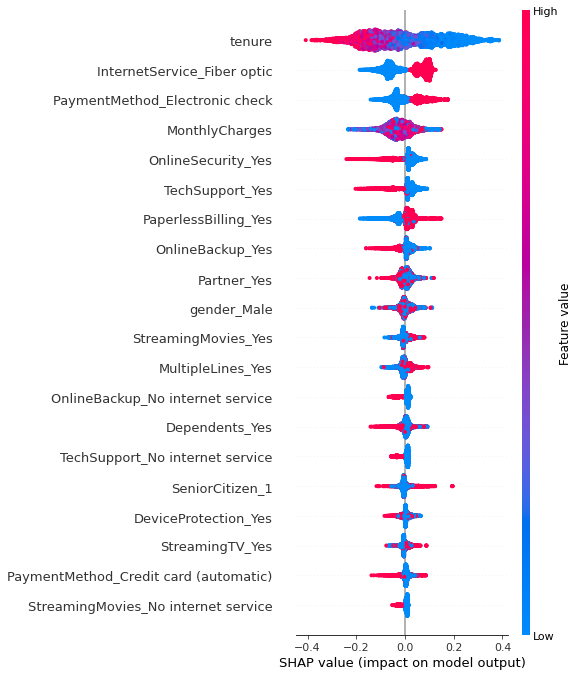

In [131]:
shap.summary_plot(shap_values[1], X_train_up)

No gráfico abaixo podemos ver com mais detalhes a influência de um determinado atributo na previsão. Quanto maior o valor do shap value (eixo y) maior a influência do atributo em puxar a previsão para ser da classe 1.

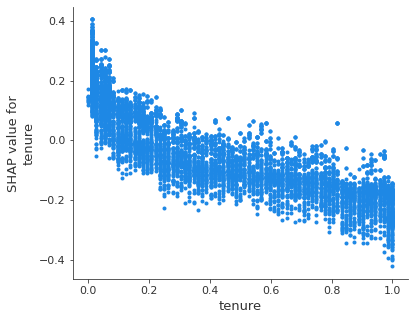

In [144]:
shap.dependence_plot("tenure", shap_values[1], X_train_up, interaction_index=None)

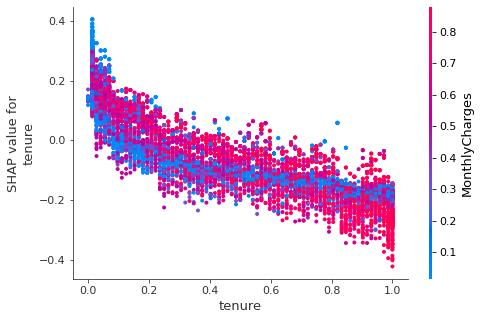

In [147]:
shap.dependence_plot("tenure", shap_values[1], X_train_up, interaction_index='MonthlyCharges')